# 보스톤 주택 가격 - 다중 회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀 직선

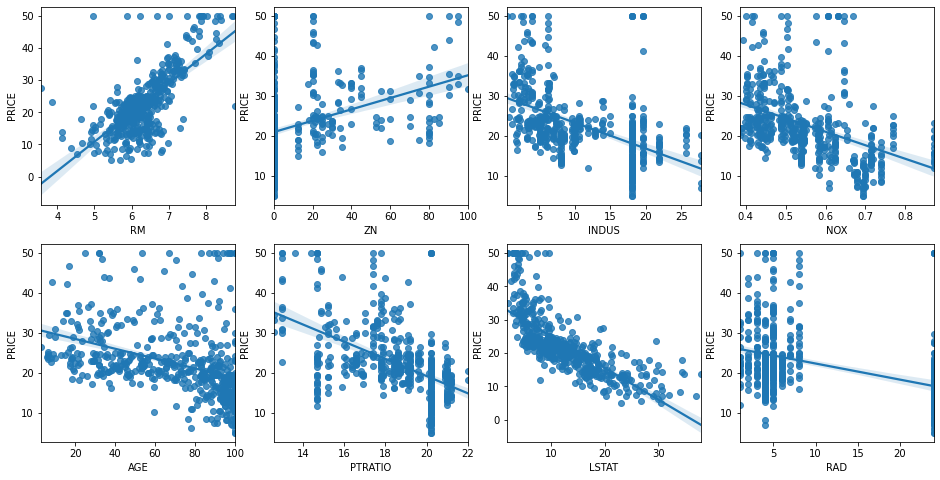

In [4]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- 어떤 feature가 Price와 상관관계가 높을까?

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
for feature in boston.feature_names:
    X = df[feature].values.reshape(-1,1)
    y = boston.target
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}: {r2:.4f}')

CRIM: 0.1508
ZN: 0.1299
INDUS: 0.2340
CHAS: 0.0307
NOX: 0.1826
RM: 0.4835
AGE: 0.1421
DIS: 0.0625
RAD: 0.1456
TAX: 0.2195
PTRATIO: 0.2578
B: 0.1112
LSTAT: 0.5441


- 다중 선형회귀

In [7]:
X = boston.data
y = boston.target
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [8]:
Weight, bias = lr.coef_, lr.intercept_
Weight

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [9]:
lr.score(X, y)

0.7406426641094095

In [11]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])